In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid")

In [4]:
df = pd.read_csv(r"C:\Users\user\Downloads\archive\StudentsPerformance.csv")

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [18]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [22]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [24]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [26]:
numerical_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:",non_numerical_columns)
print("Numerical Columns:",numerical_columns)

Categorical Columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
Numerical Columns: ['math score', 'reading score', 'writing score']


In [28]:
for col in non_numerical_columns:
    print(f"Column:{col}")
    print(f"Unique Values:{df[col].unique()}")
    print("\n")

Column:gender
Unique Values:['female' 'male']


Column:race/ethnicity
Unique Values:['group B' 'group C' 'group A' 'group D' 'group E']


Column:parental level of education
Unique Values:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


Column:lunch
Unique Values:['standard' 'free/reduced']


Column:test preparation course
Unique Values:['none' 'completed']




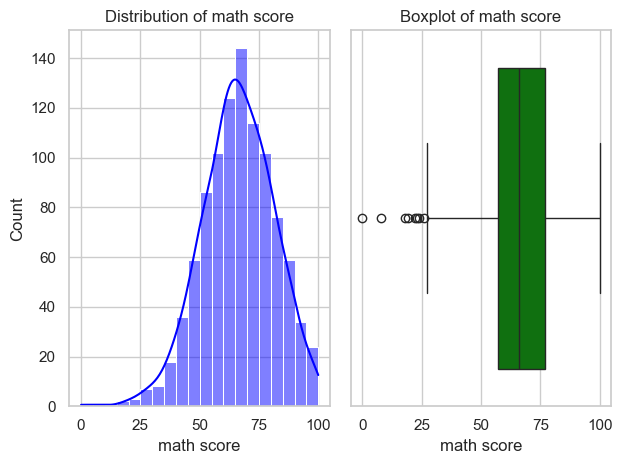

In [30]:
def plot_numerical_distribution(math_score):
    plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['math score'], bins=20, kde=True,color='blue') 
plt.title(f'Distribution of {'math score'}')
plt.subplot(1,2,2)
sns.boxplot(x=df['math score'], color='green')
plt.title(f'Boxplot of {'math score'}')
plt.tight_layout()
plt.show()

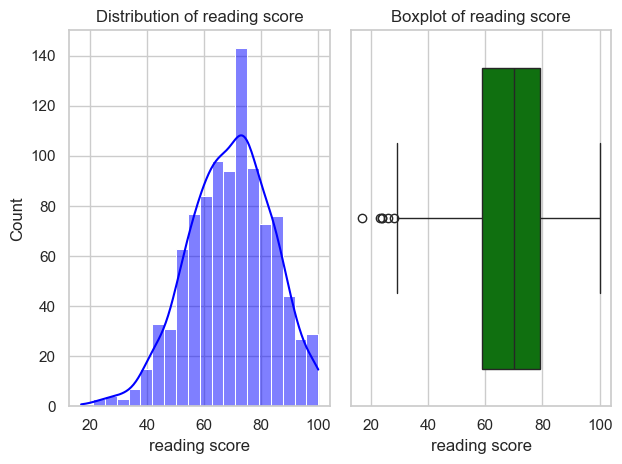

In [32]:
def plot_numerical_distribution(reading_score):
    plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['reading score'], bins=20, kde=True,color='blue') 
plt.title(f'Distribution of {'reading score'}')
plt.subplot(1,2,2)
sns.boxplot(x=df['reading score'], color='green')
plt.title(f'Boxplot of {'reading score'}')
plt.tight_layout()
plt.show()

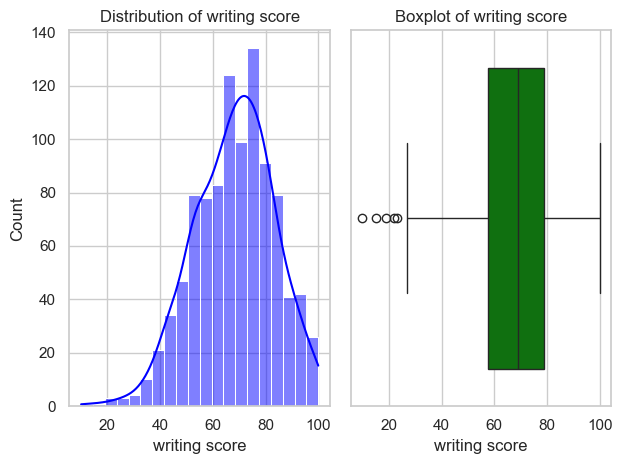

In [34]:
def plot_numerical_distribution(writing_score):
    plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['writing score'], bins=20, kde=True,color='blue') 
plt.title(f'Distribution of {'writing score'}')
plt.subplot(1,2,2)
sns.boxplot(x=df['writing score'], color='green')
plt.title(f'Boxplot of {'writing score'}')
plt.tight_layout()
plt.show()

In [36]:
subset_numerical_columns = df.select_dtypes(include=['float64', 'int64'])
subset_numerical_columns.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


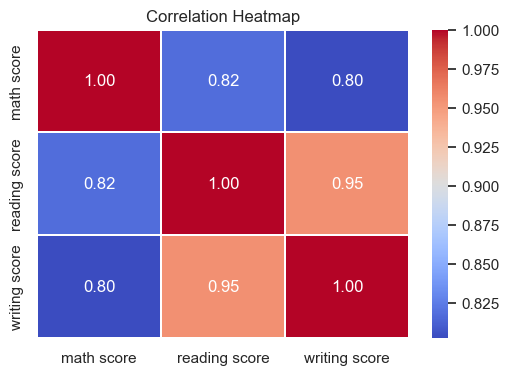

In [38]:
plt.figure(figsize=(6,4))
sns.heatmap(subset_numerical_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.2)
plt.title('Correlation Heatmap')
plt.show()